In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn.over_sampling as oversampling
import imblearn.under_sampling as undersampling
import sklearn.model_selection as selection
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing

2023-04-29 10:58:11.932874: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 10:58:11.984013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-29 10:58:11.984546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 10:58:13.158664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_regression = pd.read_csv("../preprocessed/regression_preprocessed.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.loc[:, "price"]
data_regression

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
data_classification = pd.read_csv("../preprocessed/classification_preprocessed.csv")
X_class = data_classification.drop("Delay", axis=1)
Y_class = data_classification.Delay
# X_class, Y_class = undersampling.EditedNearestNeighbours(n_neighbors=5, n_jobs=-1).fit_resample(X_class, Y_class)
data_classification

,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV,Route,Delay
0,3036,4.0,1195,131.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,315,7.0,707,145.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,6673,5.0,499,42.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,1
3,3668,2.0,810,70.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1
4,623,5.0,985,143.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397302,1533,3.0,415,150.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,334,0
397303,486,7.0,365,107.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1843,0
397304,3111,7.0,640,84.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3081,0
397305,623,1.0,1000,220.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,530,0


In [4]:
Y_class.isnull().sum()

0

In [5]:
scaler = preprocessing.StandardScaler()
X_class = pd.DataFrame(scaler.fit_transform(X_class), columns=X_class.columns)

In [6]:
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = selection.train_test_split(X_reg, Y_reg, test_size=0.2, random_state=14)
X_class_train, X_class_test, Y_class_train, Y_class_test = selection.train_test_split(X_class, Y_class, test_size=0.2, stratify=Y_class, random_state=14)

X_class_train, Y_class_train = oversampling.SMOTE().fit_resample(X_class_train, Y_class_train)

In [7]:
X_class_train, X_class_test = X_class_train.astype(float), X_class_test.astype(float)

In [124]:
regression_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(22,)),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(164, activation="relu"),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1, activation="relu")
    ]
)

In [125]:
regression_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 512)               11776     
                                                                 
 dropout_42 (Dropout)        (None, 512)               0         
                                                                 
 dense_65 (Dense)            (None, 164)               84132     
                                                                 
 dropout_43 (Dropout)        (None, 164)               0         
                                                                 
 dense_66 (Dense)            (None, 1)                 165       
                                                                 
Total params: 96,073
Trainable params: 96,073
Non-trainable params: 0
_________________________________________________________________


In [126]:
regression_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00032), loss=tf.keras.losses.MeanAbsoluteError())

In [127]:
regression_model.fit(X_reg_train, Y_reg_train, epochs=30, verbose=True, validation_data=(X_reg_test, Y_reg_test))

Epoch 1/30
1349/1349 [==============================] - 5s 3ms/step - loss: 2727.1289 - val_loss: 2412.4561
Epoch 2/30
1349/1349 [==============================] - 4s 3ms/step - loss: 1491.6537 - val_loss: 926.7224
Epoch 3/30
1349/1349 [==============================] - 4s 3ms/step - loss: 852.6095 - val_loss: 638.1009
Epoch 4/30
1349/1349 [==============================] - 4s 3ms/step - loss: 672.0685 - val_loss: 537.3658
Epoch 5/30
1349/1349 [==============================] - 4s 3ms/step - loss: 606.8711 - val_loss: 498.0281
Epoch 6/30
1349/1349 [==============================] - 4s 3ms/step - loss: 573.5131 - val_loss: 474.2061
Epoch 7/30
1349/1349 [==============================] - 4s 3ms/step - loss: 554.8109 - val_loss: 455.7705
Epoch 8/30
1349/1349 [==============================] - 4s 3ms/step - loss: 545.6752 - val_loss: 449.9449
Epoch 9/30
1349/1349 [==============================] - 4s 3ms/step - loss: 533.3649 - val_loss: 451.0529
Epoch 10/30
1349/1349 [====================

In [128]:
regression_prediction = regression_model.predict(X_reg_test)

338/338 [==============================] - 0s 1ms/step


In [129]:
print(metrics.mean_absolute_error(Y_reg_test, regression_prediction))
print(metrics.mean_squared_error(Y_reg_test, regression_prediction))
print(metrics.r2_score(Y_reg_test, regression_prediction))
print(metrics.max_error(Y_reg_test, regression_prediction))

398.4762205743418
624518.08179439
0.9609603715685305
12399.396484375


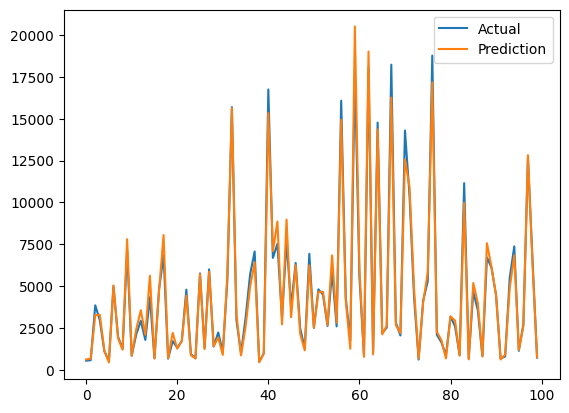

In [132]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(regression_prediction[:100], label="Prediction");
plt.legend();

In [133]:
Y_class_train.value_counts()

Delay
0    237676
1    237676
Name: count, dtype: int64

In [134]:
classification_model = tf.keras.models.load_model("./classification_model_2.keras")

In [135]:
classification_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(23,)),
        #tf.keras.layers.Dense(10000, activation="relu"),
        #tf.keras.layers.Dropout(0.1),
        #tf.keras.layers.Dense(512, activation="relu"),
        # tf.keras.layers.Dense(16, activation="relu"),
        # tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.Dense(32, activation="relu"),
        # tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="tanh"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(8, activation="tanh"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(6, activation="linear"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(128, activation="tanh"),
        #tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.Dense(32, activation="tanh"),
        # tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.Dense(16, activation="tanh"),
        # tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

In [136]:
classification_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 10)                240       
                                                                 
 dropout_44 (Dropout)        (None, 10)                0         
                                                                 
 dense_68 (Dense)            (None, 8)                 88        
                                                                 
 dropout_45 (Dropout)        (None, 8)                 0         
                                                                 
 dense_69 (Dense)            (None, 6)                 54        
                                                                 
 dropout_46 (Dropout)        (None, 6)                 0         
                                                                 
 dense_70 (Dense)            (None, 4)               

In [137]:
classification_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss=tf.keras.losses.Poisson(), metrics=[tf.metrics.BinaryAccuracy()])

In [138]:
classification_model.fit(X_class_train, Y_class_train, epochs=5, verbose=True, validation_data=(X_class_test, Y_class_test))

Epoch 1/5
14855/14855 [==============================] - 26s 2ms/step - loss: 0.8487 - binary_accuracy: 0.5279 - val_loss: 0.6615 - val_binary_accuracy: 0.7431
Epoch 2/5
14855/14855 [==============================] - 26s 2ms/step - loss: 0.8410 - binary_accuracy: 0.5601 - val_loss: 0.6570 - val_binary_accuracy: 0.7123
Epoch 3/5
14855/14855 [==============================] - 26s 2ms/step - loss: 0.8383 - binary_accuracy: 0.5787 - val_loss: 0.6548 - val_binary_accuracy: 0.6994
Epoch 4/5
14855/14855 [==============================] - 25s 2ms/step - loss: 0.8368 - binary_accuracy: 0.5899 - val_loss: 0.6551 - val_binary_accuracy: 0.6887
Epoch 5/5
14855/14855 [==============================] - 26s 2ms/step - loss: 0.8359 - binary_accuracy: 0.5944 - val_loss: 0.6521 - val_binary_accuracy: 0.6888


In [139]:
classification_prediction: np.ndarray = classification_model.predict(X_class_test)
classification_prediction

2484/2484 [==============================] - 2s 816us/step


array([[0.4147881 ],
       [0.41215932],
       [0.43332297],
       ...,
       [0.44511813],
       [0.57361585],
       [0.4114388 ]], dtype=float32)

In [140]:
classification_prediction = classification_prediction.round()
classification_prediction

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [141]:
print(metrics.classification_report(Y_class_test, classification_prediction))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     59420
           1       0.40      0.50      0.45     20042

    accuracy                           0.69     79462
   macro avg       0.61      0.63      0.62     79462
weighted avg       0.71      0.69      0.70     79462



In [103]:
from abc import ABCMeta, abstractmethod
from typing import *
from typing_extensions import Self
from numpy.typing import NDArray
import copy


class _ActivationFunction(metaclass=ABCMeta):
    '''Abstract class that should contain functions for forward and backward propagation.'''

    @staticmethod
    @abstractmethod
    def forward(X: NDArray) -> NDArray:
        raise NotImplementedError
    
    @staticmethod
    @abstractmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        raise NotImplementedError

class Sigmoid(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return 1 / (1 + np.exp(-X))
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        sigmoid = 1 / (1 + np.exp(-X))
        return dX_previous * sigmoid * (1 - sigmoid)

class Linear(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return X
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        return dX_previous

class Tanh(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return np.tanh(X)
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        tanh_ = np.tanh(X)
        return dX_previous * (1 - np.power(tanh_, 2))

class Relu(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return np.maximum(0, X)
        #return np.array([[value if value > 0 else 0 for value in row] for row in X])
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        dX_previous[X <= 0] = 0 # 🤔
        return dX_previous
    
class Softmax(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        exp_ = np.exp(X)
        sum_ = np.sum(exp_, axis=1).reshape(-1, 1)
        return exp_ / sum_
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        dX: NDArray = np.diag(X) - np.dot(X, X.T)
        return dX_previous * dX.sum(axis=0).reshape(-1, 1)

class LossFunctions:
    @staticmethod
    def mse(X: NDArray, Y: NDArray) -> float:
        return np.power(X - Y, 2).sum() / Y.shape[0]

class _PerceptronLayer(metaclass=ABCMeta):
    '''Abstract class for a perceptron layer'''
    def __init__(self, units_shape: tuple[int, int]) -> None:
        self.units_shape = units_shape
        self.X_prev: Optional[NDArray] = None
        # self.previous_layer = previous_layer
        # self.next_layer = next_layer

    @abstractmethod
    def forward_propagation(self, X: NDArray) -> NDArray:
        raise NotImplementedError
    
    @abstractmethod
    def backward_propagation(self, X: NDArray, dX_previous: NDArray) -> tuple[NDArray, Optional[dict[str, Any]]]:
        raise NotImplementedError

class InputLayer(_PerceptronLayer):
    def __init__(self, units_number: int) -> None:
        super().__init__((units_number, 1))
    
    def forward_propagation(self, X: NDArray) -> NDArray:
        self.X_prev = X
        X = np.dot(X, np.ones((1, 1)))
        return X
    
    def backward_propagation(self, X: NDArray, dX_previous: NDArray) -> tuple[NDArray, None]:
        return dX_previous, None, None

class DenseLayer(_PerceptronLayer):
    def __init__(self, func: _ActivationFunction, units_shape: tuple[int, int]) -> None:
        super().__init__(units_shape)
        self.function = func
        self.weights = np.random.randn(*units_shape)
        self.bias = np.zeros((units_shape[0], 1), dtype=float)
    
    def forward_propagation(self, X: NDArray) -> NDArray:
        # (6, 22) * (22, 1) = (6, 1) -> (3, 6) * (6, 1) = (3, 1) -> (1, 3) * (3, 1) = (1, 1)
        self.X_prev = X
        A: NDArray = self.weights.dot(X) + self.bias
        return self.function.forward(A)
    
    def backward_propagation(self, X: NDArray, dX_previous: NDArray) -> tuple[NDArray, dict[str, NDArray]]:
        m = self.X_prev.shape[1]
        dX_previous = self.function.backward(X, dX_previous)
        d_weights = dX_previous.dot(self.X_prev.T) / m
        d_bias = np.sum(dX_previous, axis=1) / m
        return (dX_previous, {"d_weights": d_weights, "d_bias": d_bias})
    
    def update_parameters(self, d_weights: NDArray, d_bias: NDArray, learning_rate: float) -> None:
        self.weights -= d_weights * learning_rate
        self.bias -= d_bias * learning_rate

class PerceptronModel:
    def __init__(self, learning_rate: float, loss_function: Callable[[NDArray, NDArray], float], layers: Optional[Iterable[_PerceptronLayer]] = None) -> None:
        self._layers = list() if layers == None else list(layers)
        self.learning_rate = learning_rate
        self._loss = loss_function
    
    def fit(self, X: NDArray, Y: NDArray, epochs: int = 1) -> Self:
        for epoch in range(epochs):
            for X_row in X:
                # cache: list[NDArray] = list()
                A: NDArray = copy.deepcopy(X_row).reshape((-1, 1))
                for i, layer in enumerate(self._layers): # forward
                    # cache.append(A.copy())
                    A = layer.forward_propagation(A)
                cost = self._loss(A, Y)
                dA = np.array([[cost * self.learning_rate]])
                for i, layer in zip(range(len(self._layers) - 1, -1, -1), reversed(self._layers)): # backward
                    A_cached = layer.X_prev
                    dA, gradients = layer.backward_propagation(A_cached, dA)
                    if isinstance(layer, DenseLayer):
                        layer.update_parameters(**gradients, learning_rate=self.learning_rate)
        return self
    
    def predict(self, X: NDArray) -> NDArray:
        A: NDArray = copy.deepcopy(X)
        for layer in self._layers:
            A = layer.forward_propagation(A)
        return A

    @property
    def layers(self) -> Optional[list[_PerceptronLayer]]:
        return self._layers

In [104]:
model_ = PerceptronModel(0.01, LossFunctions.mse)
model_.layers.extend((InputLayer(22),
                      DenseLayer(Relu, (6, 22)),
                      DenseLayer(Linear, (1, 6))))

In [105]:
X = X_reg_train.to_numpy()[:10]
Y = Y_reg_train.iloc[:10].to_numpy().reshape((-1, 1))
X.shape, Y.shape

((10, 22), (10, 1))

In [106]:
model_.fit(X, Y)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 22